Задачи: Линейная регрессия
1. Разработать модель линейной регрессии, учитывающей все (в примере),2,3 столбца входных переменных. Рассчитать MSE. 
Вывести значения коэффициентов модели.
2. Разработать модель линейной регрессии, базисные функции - полином от исходных значений. Найти зависимость MSE от
максимальной степени полинома. (max_pow <= 10)
3. Регуляризация. Гребневая регрессия. Выбрать оптимальную степень полинома, 
построить график зависимости максимального модуля параметров, MSE 
от величины alpha.
4. Регуляризация. Лассо. Выбрать оптимальную степень полинома, 
построить график зависимости максимального модуля параметров, MSE 
от величины alpha. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
linear_model.Lasso(alpha=0.1)

## 1.

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

data = pd.read_csv("Advertising.csv")

features = data[['TV', 'radio', 'newspaper']]
target = data['sales']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

for num_features in range(1, features.shape[1] + 1):
    regressor = LinearRegression() # Создание и обучение модели линейной регрессии
    regressor.fit(X_train.iloc[:, :num_features], y_train)
    
    predictions = regressor.predict(X_test.iloc[:, :num_features])
    mse_value = mean_squared_error(y_test, predictions)
    
    print(f'Использовано признаков: {num_features}, MSE: {mse_value:.2f}')
    print('Коэффициенты модели:', regressor.coef_)


Использовано признаков: 1, MSE: 10.20
Коэффициенты модели: [0.04652973]
Использовано признаков: 2, MSE: 3.14
Коэффициенты модели: [0.0447283  0.19066726]
Использовано признаков: 3, MSE: 3.17
Коэффициенты модели: [0.04472952 0.18919505 0.00276111]


## 2

Полином степени: 1, MSE: 4.402
Полином степени: 2, MSE: 0.896
Полином степени: 3, MSE: 0.672
Полином степени: 4, MSE: 0.674
Полином степени: 5, MSE: 18.238
Полином степени: 6, MSE: 1482.780
Полином степени: 7, MSE: 73878.906
Полином степени: 8, MSE: 184914.753
Полином степени: 9, MSE: 81953894933.116
Полином степени: 10, MSE: 358710515412.564


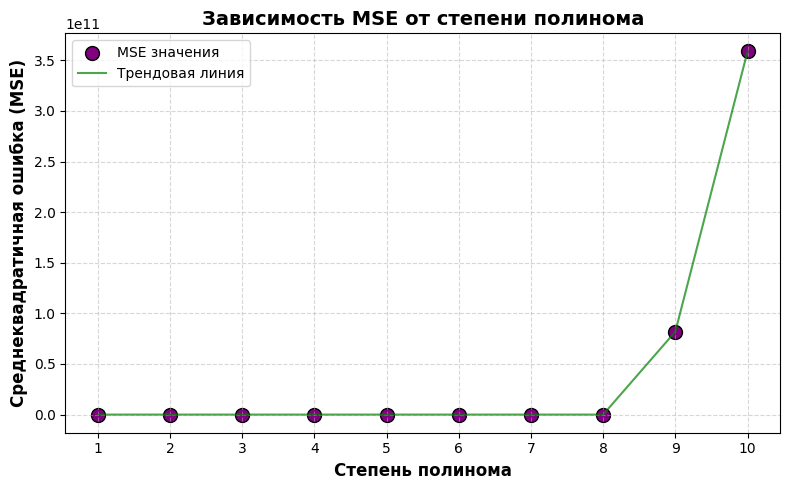

In [60]:
mse_results = []

# Перебор степеней полинома от 1 до 10
for degree in range(1, 11):
    # Преобразование данных в полиномиальные признаки
    polynomial_transformer = PolynomialFeatures(degree)
    X_transformed = polynomial_transformer.fit_transform(X)
    
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=0)
    
    # Обучение модели линейной регрессии
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)
    
    # Предсказание и расчет MSE
    predictions = poly_model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mse_results.append(mse)
    
    # Вывод текущего результата
    print(f'Полином степени: {degree}, MSE: {mse:.3f}')

plt.figure(figsize=(8, 5))
plt.scatter(range(1, 11), mse_results, color='purple', label='MSE значения', s=100, edgecolor='black')
plt.plot(range(1, 11), mse_results, linestyle='-', color='green', alpha=0.7, label='Трендовая линия')

plt.xlabel('Степень полинома', fontsize=12, fontweight='bold')
plt.ylabel('Среднеквадратичная ошибка (MSE)', fontsize=12, fontweight='bold')
plt.title('Зависимость MSE от степени полинома', fontsize=14, fontweight='bold')
plt.xticks(range(1, 11), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


## 3

c:\Users\nosko\OneDrive\Рабочий стол\cse2\venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00579e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\nosko\OneDrive\Рабочий стол\cse2\venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.46479e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\nosko\OneDrive\Рабочий стол\cse2\venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.13324e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\nosko\OneDrive\Рабочий стол\cse2\venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.10674e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrit

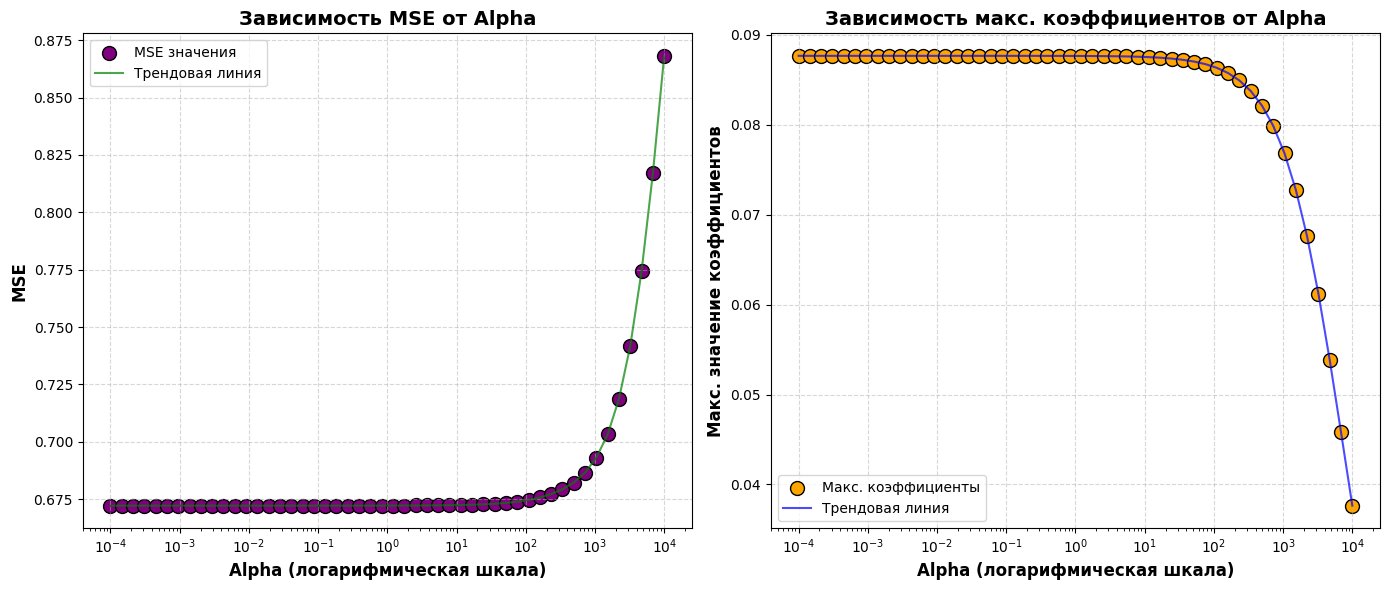

In [61]:
# Расчет MSE и максимальных коэффициентов для разных значений alpha
alpha_values = np.logspace(-4, 4, 50)
mse_results = []
max_coefficients = []

# Установка степени полинома
degree = 3
poly_transformer = PolynomialFeatures(degree)
X_transformed = poly_transformer.fit_transform(X)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=0)

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    predictions = ridge_model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mse_results.append(mse)
    max_coefficients.append(np.max(np.abs(ridge_model.coef_)))

# Визуализация
plt.figure(figsize=(14, 6))

# График зависимости MSE от alpha
plt.subplot(1, 2, 1)
plt.scatter(alpha_values, mse_results, color='purple', label='MSE значения', s=100, edgecolor='black')
plt.plot(alpha_values, mse_results, linestyle='-', color='green', alpha=0.7, label='Трендовая линия')
plt.xscale('log')
plt.xlabel('Alpha (логарифмическая шкала)', fontsize=12, fontweight='bold')
plt.ylabel('MSE', fontsize=12, fontweight='bold')
plt.title('Зависимость MSE от Alpha', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)

# График зависимости максимальных коэффициентов от alpha
plt.subplot(1, 2, 2)
plt.scatter(alpha_values, max_coefficients, color='orange', label='Макс. коэффициенты', s=100, edgecolor='black')
plt.plot(alpha_values, max_coefficients, linestyle='-', color='blue', alpha=0.7, label='Трендовая линия')
plt.xscale('log')
plt.xlabel('Alpha (логарифмическая шкала)', fontsize=12, fontweight='bold')
plt.ylabel('Макс. значение коэффициентов', fontsize=12, fontweight='bold')
plt.title('Зависимость макс. коэффициентов от Alpha', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()


## 4

c:\Users\nosko\OneDrive\Рабочий стол\cse2\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.223e+00, tolerance: 3.547e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\nosko\OneDrive\Рабочий стол\cse2\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.234e+00, tolerance: 3.161e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\nosko\OneDrive\Рабочий стол\cse2\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

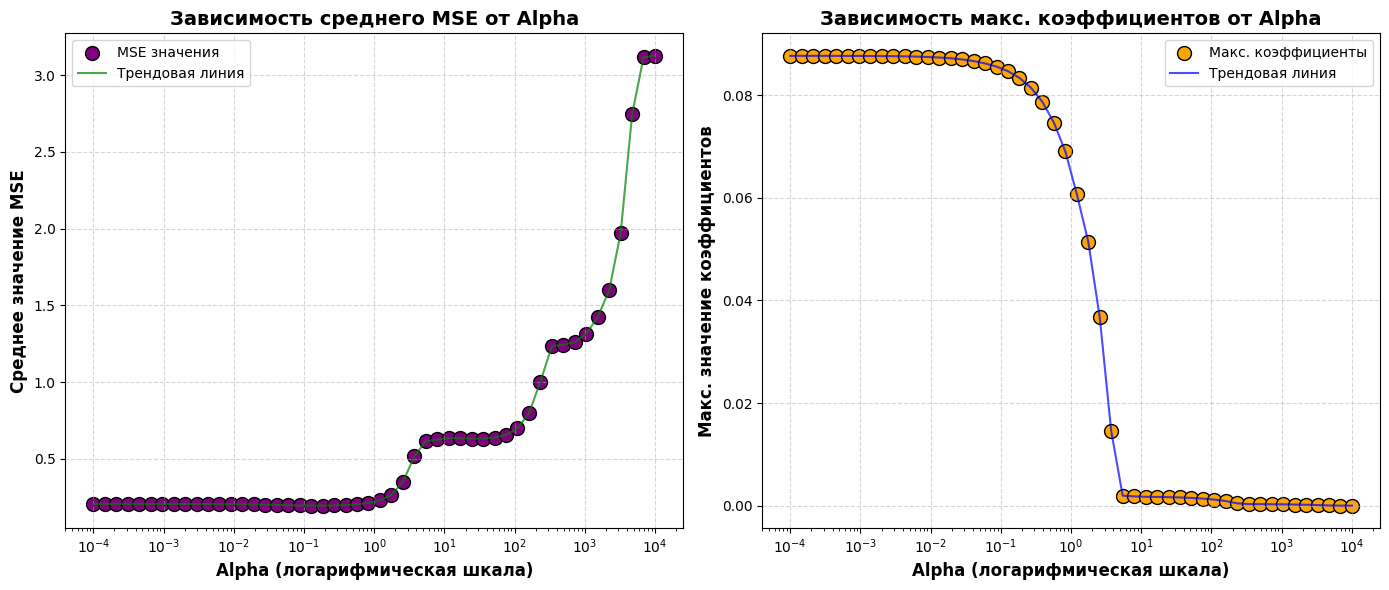

In [62]:
# Настройка диапазона значений alpha
param_grid = {'alpha': alpha_values}

# Инициализация модели Lasso
lasso = Lasso(max_iter=10000)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

# Использование GridSearchCV для поиска по параметрам
grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_poly, y_train)

# Получение результатов поиска
results = grid_search.cv_results_

# Извлечение метрик для каждого значения alpha
mean_mse_values = -results['mean_test_score']  # Учитываем отрицательный знак для MSE
max_coef_values = []

for params in results['params']:
    lasso_model = Lasso(alpha=params['alpha'], max_iter=10000)
    lasso_model.fit(X_train_poly, y_train)
    max_coef_values.append(np.max(np.abs(lasso_model.coef_)))

# Визуализация результатов
plt.figure(figsize=(14, 6))

# График зависимости MSE от alpha
plt.subplot(1, 2, 1)
plt.scatter(alpha_values, mean_mse_values, color='purple', label='MSE значения', s=100, edgecolor='black')
plt.plot(alpha_values, mean_mse_values, linestyle='-', color='green', alpha=0.7, label='Трендовая линия')
plt.xscale('log')
plt.xlabel('Alpha (логарифмическая шкала)', fontsize=12, fontweight='bold')
plt.ylabel('Среднее значение MSE', fontsize=12, fontweight='bold')
plt.title('Зависимость среднего MSE от Alpha', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)

# График зависимости максимальных коэффициентов от alpha
plt.subplot(1, 2, 2)
plt.scatter(alpha_values, max_coef_values, color='orange', label='Макс. коэффициенты', s=100, edgecolor='black')
plt.plot(alpha_values, max_coef_values, linestyle='-', color='blue', alpha=0.7, label='Трендовая линия')
plt.xscale('log')
plt.xlabel('Alpha (логарифмическая шкала)', fontsize=12, fontweight='bold')
plt.ylabel('Макс. значение коэффициентов', fontsize=12, fontweight='bold')
plt.title('Зависимость макс. коэффициентов от Alpha', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()


## last

In [63]:
from sklearn.model_selection import RandomizedSearchCV
# Определение диапазонов для гиперпараметров
param_dist = {
    'kernel': ['poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 7),  # Используем логарифмическое распределение
    'epsilon': [0.01, 0.1, 0.5, 1],
    'degree': [2, 3, 4]
}

# Инициализация модели SVR
svr = SVR()

# Применение RandomizedSearchCV с кросс-валидацией
random_search = RandomizedSearchCV(estimator=svr, param_distributions=param_dist, 
                                   scoring='neg_mean_squared_error', n_iter=50, cv=5, n_jobs=-1, random_state=42)

# Обучение модели
random_search.fit(X_train, y_train)

# Получение лучших параметров
best_model = random_search.best_estimator_
best_params = random_search.best_params_
print("Лучшие параметры:", best_params)

# Предсказания и расчет MSE
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

Лучшие параметры: {'kernel': 'sigmoid', 'epsilon': 0.1, 'degree': 2, 'C': np.float64(1.0)}
MSE: 10.767994699747524
